# Import libraries and read data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os ,sys
from google.colab import drive
drive.mount('/content/drive')
os.listdir('/content/drive')
directory_path = '/content/drive/MyDrive/bioinf_inst/omics_aging/CpG/data'
print(os.listdir(directory_path))
sys.path.append(directory_path)
directory_path_raw = directory_path

Mounted at /content/drive
['metaannot.csv', 'filterd_CpG_leiko_corrected_12032024.csv', 'GSE42861_peak_values.csv', 'PBMC_peak_values.csv', 'PBMC_GM_clustering_results.csv', 'HM450.hg38.manifest.gencode.v36.tsv.gz', 'metaannot.gsheet', 'male_genes.txt', 'female_results']


In [ ]:
# directory_path = './data/CpG/processed'
# directory_path_raw = './data/CpG/raw'

In [3]:
df = pd.read_csv(os.path.join(directory_path, 'PBMC_GM_clustering_results.csv'), index_col=0)
df.head()

,clusters
cg00008647,0
cg00295572,0
cg00346208,0
cg00448707,6
cg00563824,0


In [6]:
for_translation = pd.read_csv(os.path.join(directory_path_raw, 'HM450.hg38.manifest.gencode.v36.tsv.gz'), sep='\t')
for_translation.head()

,CpG_chrm,CpG_beg,CpG_end,probe_strand,probeID,genesUniq,geneNames,transcriptTypes,transcriptIDs,distToTSS,CGI,CGIposition
0,chr1,15864.0,15866.0,-,cg13869341,WASH7P,WASH7P,unprocessed_pseudogene,ENST00000488147.1,13706,NaN,NaN
1,chr1,18826.0,18828.0,-,cg14008030,MIR6859-1;WASH7P,MIR6859-1;WASH7P,miRNA;unprocessed_pseudogene,ENST00000619216.1;ENST00000488147.1,-1390;10744,NaN,NaN
2,chr1,29406.0,29408.0,-,cg12045430,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST000004...,-959;-860;-147;164,CGI:chr1:28735-29737,Island
3,chr1,29424.0,29426.0,-,cg20826792,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST000004...,-941;-842;-129;146,CGI:chr1:28735-29737,Island
4,chr1,29434.0,29436.0,-,cg00381604,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST000004...,-931;-832;-119;136,CGI:chr1:28735-29737,Island


In [9]:
for_translation = for_translation.drop(columns=['genesUniq', 'probe_strand', 'CGIposition','CGI']).dropna().set_index('probeID')

# Keep only CpGs that are in the most representative clusters

 In the initial analysis, we chose 2, 3, 5 and 7 clusters. Below is the improved list but you could extend the list to [0, 1, 3, 4, 5, 6, 7]

after initial analysis we realized, that two and six clusters showed the worst results. Surprisingly, most of the CpGs and many of the clusters exhibited significant changes in individuals aged 20-27 years.

In [123]:
most_interesting_clusters = [0, 1, 3, 4, 5, 6, 7]

In [124]:
annotated_df = df[df['clusters'].isin(most_interesting_clusters)]
annotated_df = annotated_df.join(for_translation[['CpG_chrm', 'geneNames', 'transcriptTypes']])

In [125]:
annotated_df['geneNames'] = annotated_df['geneNames'].apply(lambda x: ';'.join(pd.unique(str(x).split(';'))))
annotated_df['transcriptTypes'] = annotated_df['transcriptTypes'].apply(lambda x: ';'.join(pd.unique(str(x).split(';'))))
annotated_df.head()

,clusters,CpG_chrm,geneNames,transcriptTypes
cg00008647,0,chr1,FCMR,protein_coding
cg00295572,0,chr1,TP73;WRAP73,protein_coding
cg00346208,0,chr1,VWA5B1,protein_coding
cg00448707,6,chr1,DIRAS3;GNG12-AS1,protein_coding;lncRNA
cg00563824,0,chr1,AC092810.2;TFDP1P1,lncRNA;processed_pseudogene


If you want to save this dataframe, uncomment the cell below

In [12]:
# annotated_df.to_csv('detected_genes_PBMC.csv')

Split geneNames column and keep only unique genes:

In [126]:
annotated_df['geneNames'] = annotated_df['geneNames'].apply(lambda x: ';'.join(pd.unique(str(x).split(';'))))
# Uncomment next line in case to select only protein coding genes
# annotated_df['transcriptTypes'] = annotated_df['transcriptTypes'].apply(lambda x: ';'.join(pd.unique(str(x).split(';'))))
annotated_df.head()

,clusters,CpG_chrm,geneNames,transcriptTypes
cg00008647,0,chr1,FCMR,protein_coding
cg00295572,0,chr1,TP73;WRAP73,protein_coding
cg00346208,0,chr1,VWA5B1,protein_coding
cg00448707,6,chr1,DIRAS3;GNG12-AS1,protein_coding;lncRNA
cg00563824,0,chr1,AC092810.2;TFDP1P1,lncRNA;processed_pseudogene


In [127]:
cpg_genes = annotated_df['geneNames'].apply(lambda x: x.split(';'))
cpg_genes = [gene for sublist in cpg_genes for gene in sublist if gene != 'nan']
cpg_genes = set(cpg_genes)
len(cpg_genes)

3354

In [53]:
# with open(os.path.join(directory_path, 'PBMC_24_genes.txt'), 'w') as fp:
#     fp.write(str(cpg_genes))

 ## Not nessesary additional analysis
 There were still a large number of CpGs remaining, we could proceed by calculating the ratio before and after the most interesting ages. Following this, we would analyze the distribution and determine a threshold for identifying the top CpGs

In [119]:
grouped_mean = pd.read_csv(os.path.join(directory_path, 'PBMC_grouped_mean.csv'), index_col=0)
grouped_mean.head()

,cg00008647,cg00295572,cg00346208,cg00448707,cg00563824,cg00664416,cg00764612,cg00908766,cg00951395,cg01101873,...,cg18855195,cg19543968,cg19558972,cg19713460,cg19800640,cg19855470,cg21401457,cg21445911,cg24435209,cg26169700
1,0.142651,0.090179,0.152536,0.709222,0.183224,0.230960,0.278993,0.626871,0.361373,0.527580,...,0.452035,0.369036,0.281921,0.203617,0.839915,0.232094,0.570487,0.843914,0.564064,0.838368
2,0.164356,0.093938,0.148583,0.717843,0.215201,0.222130,0.291848,0.651192,0.348352,0.532402,...,0.463319,0.369573,0.285399,0.214094,0.863047,0.238011,0.570809,0.844426,0.574743,0.852213
3,0.158577,0.094252,0.146086,0.729551,0.213541,0.219806,0.291854,0.616299,0.364441,0.522647,...,0.447641,0.360867,0.282848,0.203432,0.714329,0.222420,0.512679,0.840526,0.565618,0.839834
4,0.162130,0.095583,0.174032,0.723731,0.191491,0.215864,0.299227,0.621410,0.375271,0.509403,...,0.451213,0.365245,0.249363,0.207516,0.774937,0.232766,0.577896,0.848106,0.589996,0.844828
5,0.189082,0.109096,0.158058,0.729331,0.189944,0.231346,0.321914,0.736866,0.398367,0.509816,...,0.423288,0.363856,0.261764,0.231177,0.896658,0.266081,0.480448,0.835882,0.551596,0.826452


In [59]:
grouped_mean.index

Index([ 1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,  8, 10, 17],
      dtype='int64')

In [61]:
age_ranges_df = pd.DataFrame()
age_ranges_df['19-23'] = grouped_mean.loc[19:23].mean(axis=0)
age_ranges_df['25-27'] = grouped_mean.loc[25:27].mean(axis=0)
age_ranges_df['30-34'] = grouped_mean.loc[30:34].mean(axis=0)
age_ranges_df['39-43'] = grouped_mean.loc[39:43].mean(axis=0)
age_ranges_df['57-59'] = grouped_mean.loc[57:59].mean(axis=0)
age_ranges_df['63-65'] = grouped_mean.loc[63:65].mean(axis=0)
age_ranges_df.head()

,19-23,25-27,30-34,39-43,57-59,63-65
cg00008647,0.194865,0.098603,0.129908,0.163677,0.185281,0.172459
cg00295572,0.046694,0.040030,0.067504,0.085629,0.114336,0.106160
cg00346208,0.122531,0.086773,0.096807,0.126997,0.164408,0.163394
cg00448707,0.645279,0.682776,0.645332,0.705454,0.723190,0.732764
cg00563824,0.168796,0.176615,0.146405,0.193706,0.237615,0.233785


In [64]:
transition_df = pd.DataFrame()
transition_df['1'] = age_ranges_df['19-23']/age_ranges_df['25-27']
transition_df['2'] = age_ranges_df['30-34']/age_ranges_df['39-43']
transition_df['3'] = age_ranges_df['57-59']/age_ranges_df['63-65']
transition_df.head()

,1,2,3
cg00008647,1.976255,0.793687,1.074351
cg00295572,1.166474,0.788333,1.077023
cg00346208,1.412077,0.762281,1.006201
cg00448707,0.945083,0.914775,0.986935
cg00563824,0.955729,0.755810,1.016385


In [75]:
transition_df[transition_df['1']<0]

,1,2,3
cg26872137,-17.174858,0.643249,1.028689


In [76]:
transition_df = transition_df.drop(index='cg26872137')

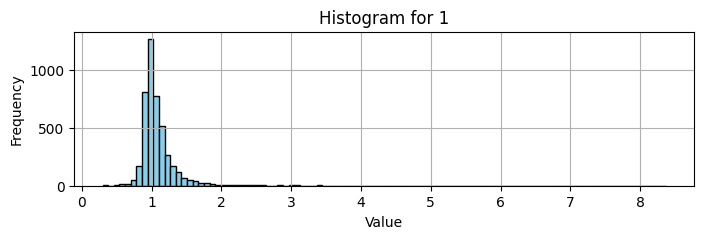

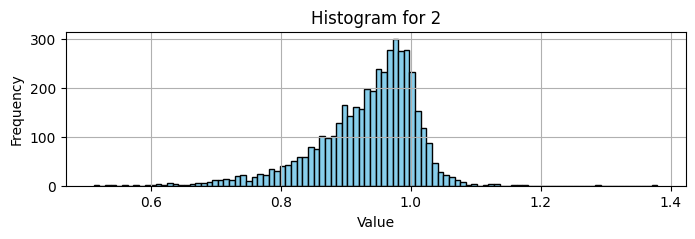

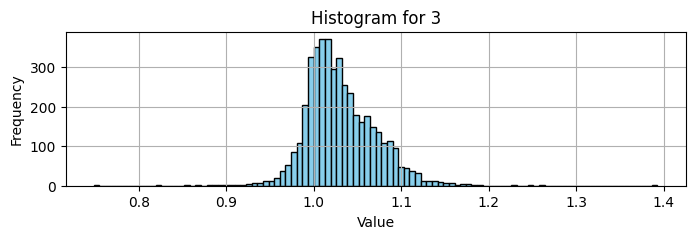

In [85]:
# Plot histograms for each column
for col in transition_df.columns:
    plt.figure(figsize=(8, 2))
    plt.hist(transition_df[col], bins=100, color='skyblue', edgecolor='black')
    # plt.xlim(0,1.5)
    plt.title(f'Histogram for {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Select CpGs which

In [110]:
cpgs_for_1_transition = list(transition_df[transition_df['1']>1].index) + list(transition_df[transition_df['1']<1].index)
len(cpgs_for_1_transition)

4455

In [111]:
transition_24_cpgs = annotated_df.index[annotated_df.index.isin(cpgs_for_1_transition)]
annotated_df_24 = annotated_df.loc[transition_24_cpgs].dropna()
annotated_df_24

,clusters,CpG_chrm,geneNames,transcriptTypes
cg00008647,0,chr1,FCMR,protein_coding
cg00295572,0,chr1,TP73;WRAP73,protein_coding
cg00346208,0,chr1,VWA5B1,protein_coding
cg00448707,6,chr1,DIRAS3;GNG12-AS1,protein_coding;lncRNA
cg00563824,0,chr1,AC092810.2;TFDP1P1,lncRNA;processed_pseudogene
...,...,...,...,...
cg19713460,7,chr22,SYNGR1,protein_coding
cg19800640,6,chr22,SYCE3,protein_coding
cg19855470,0,chr22,CACNA1I,protein_coding
cg24435209,4,chr22,HDHD5;HDHD5-AS1,protein_coding;lncRNA


In [112]:
cpg_genes = annotated_df_24['geneNames'].apply(lambda x: x.split(';'))
cpg_genes = [gene for sublist in cpg_genes for gene in sublist if gene != 'nan']
cpg_genes = set(cpg_genes)
len(cpg_genes)

3354

# Intersection with RNA

List of genes obtained for 24-year-olds from transcriptomics data

Genes from RNA data

'ABCE1', 'AGGF1', 'APPL1', 'ARL6', 'ARMC2', 'ASH2L', 'ATE1', 'ATF7IP2', 'ATG16L1', 'ATG2B', 'ATP2C1', 'BRWD1', 'BRWD3', 'C1GALT1C1', 'CAPRIN1', 'CCDC138', 'CCDC6', 'CDK8', 'CUBN', 'CUTC', 'DDX52', 'DET1', 'DNM1L', 'DUS4L', 'ELK3', 'ENO3', 'ERC1', 'ERCC3', 'ERCC5', 'ERCC6', 'ETFDH', 'EXOSC3', 'FOXN3', 'GORASP2', 'GPATCH2', 'HAS3', 'HDAC2', 'HDHD2', 'HERC4', 'HIBADH', 'HIVEP2', 'INTS4', 'ISOC1', 'KDELR2', 'KRR1', 'LIAS', 'LNPEP', 'LPP', 'LRIG1', 'M6PR', 'MAD2L1', 'MAGOHB', 'MAPKAP1', 'METTL5', 'MLH3', 'MLLT10', 'MON2', 'MPP7', 'MRPS27', 'MYCBP2', 'NCOA7', 'NPHP3', 'NSMCE2', 'NSUN6', 'NUP37', 'ORMDL1', 'OSBPL3', 'OXCT1', 'PAK2', 'PARN', 'PARP11', 'PARP2', 'PDCD6IP', 'PDHX', 'PDS5B', 'PGAM5', 'PGAP1', 'PHC3', 'PHF20L1', 'PHIP', 'PIAS2', 'PIGK', 'PTP4A2', 'RARS2', 'RBM26', 'REEP3', 'REPS1', 'RMND1', 'RNF38', 'RNF8', 'RWDD2B', 'SECISBP2', 'SEPSECS', 'SETD2', 'SETX', 'SFXN1', 'SLC10A7', 'SMAD2', 'SMC4', 'STAU2', 'STX2', 'TAF1B', 'TAF5L', 'TBC1D2B', 'TC2N', 'TCEANC', 'TDRKH', 'TERF1', 'THBS3', 'TIA1', 'TIAL1', 'TIAM1', 'TMEM135', 'TMPO', 'TOPBP1', 'TOR1AIP1', 'TPK1', 'TRAK2', 'TRAPPC10', 'TRNT1', 'TTLL5', 'UBA3', 'UBE2K', 'UBXN7', 'UPF2', 'UPF3B', 'USP10', 'USP14', 'USP44', 'UTP18', 'VPS36', 'WDR70', 'WWP1', 'XPO7', 'YARS2', 'ZBTB41', 'ZBTB44', 'ZCWPW1', 'ZFYVE21', 'ZHX3', 'ZNF101', 'ZNF362', 'ZNF383', 'ZNF429', 'ZNF606', 'ZZZ3', 'ABHD12', 'ABHD2', 'ABI1', 'ACTR2', 'ADCK5', 'AGTRAP', 'AHNAK', 'AIP', 'APH1A', 'ARL5B', 'ARPC1B', 'ARPC2', 'ATAD2', 'ATG9A', 'BCL2L11', 'BSDC1', 'BTAF1', 'CCDC9', 'CDK4', 'CDK9', 'CDKN1B', 'CFL1', 'CHD4', 'CHRAC1', 'CIAPIN1', 'CLN8', 'CUEDC2', 'DDX24', 'DDX50', 'DERL2', 'DNAJB6', 'EMD', 'ENO1', 'EPB41', 'ERH', 'ERP44', 'EXOSC1', 'EXOSC7', 'FAHD2A', 'GGCT', 'GLIPR1', 'GLRX2', 'GPBP1', 'HADHA', 'HDAC5', 'HDDC2', 'HEXA', 'HIP1R', 'HMGXB4', 'HNRNPUL1', 'IFT57', 'KATNA1', 'KBTBD7', 'LRPAP1', 'LSM14A', 'MAGT1', 'MED4', 'MED6', 'MLF2', 'MOAP1', 'MRPL9', 'NCKAP1L', 'NMI', 'NOC4L', 'ORMDL2', 'OXA1L', 'P2RX4', 'PA2G4', 'PARP3', 'PBX3', 'PCBP1', 'PCBP2', 'PCGF6', 'PCNP', 'PDCL', 'PIGS', 'PINK1', 'PNPLA2', 'POLDIP2', 'POLE3', 'POLR1D', 'PRDM4', 'PRPF39', 'PVRIG', 'RAB35', 'RBM11', 'RCC1', 'RLF', 'RNF26', 'RNF6', 'RNH1', 'RNPEP', 'RP9', 'RPP14', 'SAMD4B', 'SCAMP2', 'SFT2D2', 'SH2D3C', 'SHOC2', 'SIPA1L1', 'SLC25A16', 'SLC25A32', 'SLC26A6', 'SLC37A1', 'SLC38A4', 'SMAD4', 'SNRNP27', 'SRRD', 'STAM', 'TAPT1', 'TBX19', 'TERF2', 'TFDP1', 'TFDP2', 'TFE3', 'TGFBR1', 'TGFBR2', 'THYN1', 'TLE4', 'TLK2', 'TMBIM6', 'TMED4', 'TMEM106C', 'TMEM109', 'TMEM115', 'TMEM141', 'TMEM208', 'TMEM62', 'TOE1', 'TRMT12', 'TXNDC12', 'UBA2', 'UBFD1', 'USP47', 'USP8', 'WDR91', 'WIPI2', 'ZKSCAN4', 'ZNF426', 'ZNF451', 'ZNF567', 'ZNF655', 'ZNF691', 'ZWILCH'

In [128]:
rna_genes = set(['ABCE1', 'AGGF1', 'APPL1', 'ARL6', 'ARMC2', 'ASH2L', 'ATE1', 'ATF7IP2', 'ATG16L1', 'ATG2B', 'ATP2C1', 'BRWD1', 'BRWD3', 'C1GALT1C1', 'CAPRIN1', 'CCDC138', 'CCDC6', 'CDK8', 'CUBN', 'CUTC', 'DDX52', 'DET1', 'DNM1L', 'DUS4L', 'ELK3', 'ENO3', 'ERC1', 'ERCC3', 'ERCC5', 'ERCC6', 'ETFDH', 'EXOSC3', 'FOXN3', 'GORASP2', 'GPATCH2', 'HAS3', 'HDAC2', 'HDHD2', 'HERC4', 'HIBADH', 'HIVEP2', 'INTS4', 'ISOC1', 'KDELR2', 'KRR1', 'LIAS', 'LNPEP', 'LPP', 'LRIG1', 'M6PR', 'MAD2L1', 'MAGOHB', 'MAPKAP1', 'METTL5', 'MLH3', 'MLLT10', 'MON2', 'MPP7', 'MRPS27', 'MYCBP2', 'NCOA7', 'NPHP3', 'NSMCE2', 'NSUN6', 'NUP37', 'ORMDL1', 'OSBPL3', 'OXCT1', 'PAK2', 'PARN', 'PARP11', 'PARP2', 'PDCD6IP', 'PDHX', 'PDS5B', 'PGAM5', 'PGAP1', 'PHC3', 'PHF20L1', 'PHIP', 'PIAS2', 'PIGK', 'PTP4A2', 'RARS2', 'RBM26', 'REEP3', 'REPS1', 'RMND1', 'RNF38', 'RNF8', 'RWDD2B', 'SECISBP2', 'SEPSECS', 'SETD2', 'SETX', 'SFXN1', 'SLC10A7', 'SMAD2', 'SMC4', 'STAU2', 'STX2', 'TAF1B', 'TAF5L', 'TBC1D2B', 'TC2N', 'TCEANC', 'TDRKH', 'TERF1', 'THBS3', 'TIA1', 'TIAL1', 'TIAM1', 'TMEM135', 'TMPO', 'TOPBP1', 'TOR1AIP1', 'TPK1', 'TRAK2', 'TRAPPC10', 'TRNT1', 'TTLL5', 'UBA3', 'UBE2K', 'UBXN7', 'UPF2', 'UPF3B', 'USP10', 'USP14', 'USP44', 'UTP18', 'VPS36', 'WDR70', 'WWP1', 'XPO7', 'YARS2', 'ZBTB41', 'ZBTB44', 'ZCWPW1', 'ZFYVE21', 'ZHX3', 'ZNF101', 'ZNF362', 'ZNF383', 'ZNF429', 'ZNF606', 'ZZZ3', 'ABHD12', 'ABHD2', 'ABI1', 'ACTR2', 'ADCK5', 'AGTRAP', 'AHNAK', 'AIP', 'APH1A', 'ARL5B', 'ARPC1B', 'ARPC2', 'ATAD2', 'ATG9A', 'BCL2L11', 'BSDC1', 'BTAF1', 'CCDC9', 'CDK4', 'CDK9', 'CDKN1B', 'CFL1', 'CHD4', 'CHRAC1', 'CIAPIN1', 'CLN8', 'CUEDC2', 'DDX24', 'DDX50', 'DERL2', 'DNAJB6', 'EMD', 'ENO1', 'EPB41', 'ERH', 'ERP44', 'EXOSC1', 'EXOSC7', 'FAHD2A', 'GGCT', 'GLIPR1', 'GLRX2', 'GPBP1', 'HADHA', 'HDAC5', 'HDDC2', 'HEXA', 'HIP1R', 'HMGXB4', 'HNRNPUL1', 'IFT57', 'KATNA1', 'KBTBD7', 'LRPAP1', 'LSM14A', 'MAGT1', 'MED4', 'MED6', 'MLF2', 'MOAP1', 'MRPL9', 'NCKAP1L', 'NMI', 'NOC4L', 'ORMDL2', 'OXA1L', 'P2RX4', 'PA2G4', 'PARP3', 'PBX3', 'PCBP1', 'PCBP2', 'PCGF6', 'PCNP', 'PDCL', 'PIGS', 'PINK1', 'PNPLA2', 'POLDIP2', 'POLE3', 'POLR1D', 'PRDM4', 'PRPF39', 'PVRIG', 'RAB35', 'RBM11', 'RCC1', 'RLF', 'RNF26', 'RNF6', 'RNH1', 'RNPEP', 'RP9', 'RPP14', 'SAMD4B', 'SCAMP2', 'SFT2D2', 'SH2D3C', 'SHOC2', 'SIPA1L1', 'SLC25A16', 'SLC25A32', 'SLC26A6', 'SLC37A1', 'SLC38A4', 'SMAD4', 'SNRNP27', 'SRRD', 'STAM', 'TAPT1', 'TBX19', 'TERF2', 'TFDP1', 'TFDP2', 'TFE3', 'TGFBR1', 'TGFBR2', 'THYN1', 'TLE4', 'TLK2', 'TMBIM6', 'TMED4', 'TMEM106C', 'TMEM109', 'TMEM115', 'TMEM141', 'TMEM208', 'TMEM62', 'TOE1', 'TRMT12', 'TXNDC12', 'UBA2', 'UBFD1', 'USP47', 'USP8', 'WDR91', 'WIPI2', 'ZKSCAN4', 'ZNF426', 'ZNF451', 'ZNF567', 'ZNF655', 'ZNF691', 'ZWILCH'])

In [129]:
len(rna_genes)

290

In [130]:
cpg_genes.intersection(rna_genes)

{'AHNAK',
 'ATP2C1',
 'BCL2L11',
 'CDKN1B',
 'CLN8',
 'DNAJB6',
 'EXOSC3',
 'FOXN3',
 'GLRX2',
 'HDAC5',
 'LPP',
 'MLLT10',
 'OSBPL3',
 'PARP3',
 'PHC3',
 'PINK1',
 'PRPF39',
 'PTP4A2',
 'SEPSECS',
 'SLC25A32',
 'SLC37A1',
 'TAF1B',
 'TERF2',
 'TFDP1',
 'TRAK2',
 'ZFYVE21'}

In [131]:
len(cpg_genes.intersection(rna_genes))

26